## **H1N1 AND SEASONAL FLU VACCINES** ##

**BUSINESS UNDERSTANDING**


The COVID-19 pandemic has highlighted the critical importance of vaccination campaigns in controlling the spread of infectious diseases. Public health efforts are more effective when they are informed by an understanding of the factors that influence individuals' decisions to get vaccinated. By analyzing past vaccination patterns, such as those during the 2009 H1N1 flu pandemic, we can gain valuable insights that can help design better vaccination strategies, improve communication campaigns, and ultimately increase vaccine uptake in future public health crises.

**PROBLEM STATEMENT**

The task is to predict whether individuals received the H1N1 flu vaccine or the seasonal flu vaccine using data from the 2009 National H1N1 Flu Survey. This binary classification problem involves analyzing various factors, such as demographics, opinions, and health behaviors, to determine their relationship with vaccination behavior. The outcome of this analysis will help public health authorities identify key factors influencing vaccine acceptance and inform strategies to enhance vaccine coverage in the population.

**OBJECTIVES**

**Identify Key Predictors**: Determine the most significant factors that influence whether an individual received the H1N1 or seasonal flu vaccine in 2009.

**Develop a Predictive Model**: Build a binary classification model to accurately predict whether a survey respondent received the chosen vaccine (either H1N1 or seasonal flu).

**Evaluate Model Performance**: Assess the model's performance using appropriate metrics such as accuracy, precision, recall, and F1 score to ensure its reliability in predicting vaccination behavior.

**Provide Actionable Insights**: Analyze the model's findings to provide public health authorities with actionable insights that can guide future vaccination campaigns and strategies, particularly in the context of managing public health responses to pandemics.

## **DATA UNDERSTANDING** ##

**Importing Libraries**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Datasets**

We will load the train, test and label datasets. The train will be used to train our model, the test will be used for  testing the model performance and  the label dataset which has the following target variables:
h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
seasonal_vaccine - Whether respondent received seasonal flu vaccine.

In [40]:
train_data = pd.read_csv('Data/training_set_features.csv')
test_data = pd.read_csv('Data/test_set_features.csv')
label_data = pd.read_csv('Data/training_set_labels.csv')

**Data Inspection**

In [41]:
#inspecting the data sizes of the train,test and label
print('Train shape:', train_data.shape)

print('test shape:', test_data.shape)

print('label shape:', label_data.shape)

Train shape: (26707, 36)
test shape: (26708, 36)
label shape: (26707, 3)


From above results, we see that both the train and test datasets have the same number of rows(26,707) and columns(36). The label data on the other end has also same number of rows which is 26,707 and 3 columns. This is because the label data just contains the target variables and the responded ids.

In [42]:
#inspecting the first five rows of the train dataset
train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [43]:
#inspecting the first five rows of the test dataset
test_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


From the first five rows for both the train and test, we can note that some columns have missing values as well as data that does not have any significant meaning for utilization. This is observed in the employment_industry, employment_occupation and the hse_geo_region features. We will further handle this later during preprocessing.

In [44]:
label_data.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


something woth noting from the inspection of the label data is that it conatains  a key column which is the respondent_id which was also available in the train dataset. We will use this column to marge the target variables to the train data to aid with our modeling process.

In [45]:
#overall inspection of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

The dataset contains 26,707 entries with 36 columns.The dataset is a mix of numerical and categorical data types, with 23 columns of type float64, 1 column of type int64, and 12 columns of type object.

**Key Observations**:

**Missing Data**:

Several columns contain missing values, which need to be addressed during the data cleaning process. For example:

doctor_recc_h1n1 and doctor_recc_seasonal have a significant amount of missing data, with 24,547 non-null values out of 26,707 entries.

health_insurance has missing values in over 45% of the entries, with only 14,433 non-null values.

The columns employment_industry and employment_occupation have the highest number of missing values, with only 13,377 and 13,237 non-null values, respectively.

**Column Types**:
Based on the data types observed for each column types described below, we will not need to do any data type conversion since sll the columns are in their desired datatype format.
**Numeric Columns:** There are 23 numeric columns (float64 type) that primarily represent levels of concern, knowledge, and behaviors related to H1N1 and seasonal flu, as well as some demographic information (e.g., household size).
**Categorical Columns:** The dataset includes 12 categorical columns (object type), such as age_group, education, race, sex, and employment_status. These are critical for demographic analysis and will likely need encoding before modeling.

**Identifier Column:** respondent_id is a unique identifier for each survey respondent and is of type int64.

In [46]:
#overall statistics
train_data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


**Binary Variables (0 or 1 values):**

Many columns, such as behavioral_antiviral_meds, behavioral_avoidance, behavioral_face_mask, and others, have minimum values of 0 and maximum values of 1, which are typical for binary variables. However, the mean values for these variables are quite low, suggesting that most respondents answered 0 (indicating 'No'). Since the range is limited to 0 and 1, no outliers can be identified in these columns based on the max, min, or mean values.

**Ordinal Variables (e.g., h1n1_concern, h1n1_knowledge):**

Variables like h1n1_concern and h1n1_knowledge have minimum values of 0, maximum values of 3 or 2, and mean values that do not reach the maximum. This distribution suggests a skew towards lower concern or knowledge, with fewer respondents scoring at the high end. Since these are ordinal variables, the values themselves are constrained, but if a variable has a mean much closer to the lower end (e.g., h1n1_knowledge with a mean of 1.26 and a max of 2), it suggests a concentration of responses at the lower levels.


**Household Variables (household_adults, household_children):**

Household variables, such as household_adults and household_children, typically have minimum values of 0 (indicating no adults or children in the household) and maximum values that reflect the upper limits of the survey data. For instance, a higher max value for household_adults could indicate larger family sizes in some households. However, the mean values for these variables tend to be closer to the lower end, suggesting that most households have fewer adults or children. In these cases, extreme values (such as a very high number of adults or children) could be considered outliers if they deviate significantly from the typical household structure, but these outliers might reflect genuine variability in household sizes rather than errors in the data.

In [47]:
#getting the column names
train_data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [48]:
#checking the unique values for some features to determine how to later handle them during preprocessing

unique_values = {
    'income_poverty': train_data['income_poverty'].unique(),
    'marital_status': train_data['marital_status'].unique(),
    'rent_or_own': train_data['rent_or_own'].unique(),
    'employment_status': train_data['employment_status'].unique(),
    'education': train_data['education'].unique(),
    'race': train_data['race'].unique(),
    'sex': train_data['sex'].unique(),
    'age_group': train_data['age_group'].unique(),
    'train_data.columns': train_data.columns.tolist()
}

# Print unique values for each feature
for feature, values in unique_values.items():
    print(f"Unique values for {feature}: {values}")

Unique values for income_poverty: ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
Unique values for marital_status: ['Not Married' 'Married' nan]
Unique values for rent_or_own: ['Own' 'Rent' nan]
Unique values for employment_status: ['Not in Labor Force' 'Employed' 'Unemployed' nan]
Unique values for education: ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
Unique values for race: ['White' 'Black' 'Other or Multiple' 'Hispanic']
Unique values for sex: ['Female' 'Male']
Unique values for age_group: ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
Unique values for train_data.columns: ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'h

From above inspection, we observe the following:

Income Poverty: Categories include 'Below Poverty', '<= $75,000, Above Poverty', '> $75,000', with some missing values (NaN).
Marital Status: Includes 'Not Married', 'Married', with missing values.
Rent or Own: 'Own' vs. 'Rent', with missing values.
Employment Status: 'Not in Labor Force', 'Employed', 'Unemployed', and some missing values.
Education: 'Below 12 Years', '12 Years', 'Some College', 'College Graduate', with missing values.
Race: 'White', 'Black', 'Other or Multiple', 'Hispanic'.
Sex: 'Female', 'Male'.
Age Group: '18 - 34 Years', '35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '65+ Years'.

From this we can decide to impute our missing values with 'unknown' value to avoid any manipulation or we can decide to drop them if the impact is minimal

## **DATA PREPROCESSING** ##

**DATA MERGE**

Since we have our target variables in a separate file which is the label dataset, we will need to merge them with the train data before we proceed with preprocessing and plotting of outliers and any normalization required.

We will merge the two datasets using the respondent_id which is present in both files.

In [49]:
#merging of datasets
train_df_merged = train_data.merge(label_data, on='respondent_id')

In [50]:
#checking the data sizes before and after merging
print('Shape before Merging', train_data.shape)
print('Shape after Merging', train_df_merged.shape)

Shape before Merging (26707, 36)
Shape after Merging (26707, 38)


From above output, we see that the data size has changed since we have an addition of 2 columns making the new column number total to 38 while the row sizes remain the same(26,707). 
We will focus on only one target which is the H1N1 vaccine. So will go ahead and drop the seasonal vaccine column

In [51]:
#Dropping seasonal_vaccine target
train_df_merged.drop('seasonal_vaccine', axis=1, inplace=True)

In [52]:
#checking to ensure the column is dropped and the same  has reflected in our dataframe
train_df_merged.shape

(26707, 37)

**HANDLING MISSING VALUES**

1. First we will get the percentages of missing values for each column
2. We will then impute the missing values either by dropping them or replacing them with another value these could be median or mode or 'Uknown'.

In [53]:
#Getting percenatges of missing values 
def missing_data_percentage(df):
    missing_data = df.isnull().sum()
    missing_percentage = (missing_data / len(df)) * 100
    return pd.DataFrame({
        'Total Missing Values': missing_data,
        'Percentage Missing': missing_percentage
    })

# Calculate missing data percentages
train_missing = missing_data_percentage(train_df_merged)


# Display missing data percentages
print("Training Data Missing Values:")
print(train_missing.sort_values(by='Percentage Missing', ascending=False))

Training Data Missing Values:
                             Total Missing Values  Percentage Missing
employment_occupation                       13470           50.436215
employment_industry                         13330           49.912008
health_insurance                            12274           45.957989
income_poverty                               4423           16.561201
doctor_recc_h1n1                             2160            8.087767
doctor_recc_seasonal                         2160            8.087767
rent_or_own                                  2042            7.645936
employment_status                            1463            5.477965
marital_status                               1408            5.272026
education                                    1407            5.268282
chronic_med_condition                         971            3.635751
child_under_6_months                          820            3.070356
health_worker                                 804           

**HANDLING UNNECCESARY COLUMNS**

We will drop the columns that were observed to have data that does not make sense. These was observed in the following columns:

employment_industry,employment_occupation,hhse_geo_region, census_msa

In [54]:
# List of columns to drop
columns_to_drop = [
    'employment_industry',
    'employment_occupation', 'census_msa', 'hhs_geo_region', 'health_insurance','income_poverty'
]

# Drop the specified columns from the training and test datasets
train_data_cleaned = train_df_merged.drop(columns=columns_to_drop)

In [55]:
print(train_data_cleaned.shape)

(26707, 31)


In [56]:
# Calculate missing data percentages
train_missing2 = missing_data_percentage(train_data_cleaned)


# Display missing data percentages
print("Training Data Missing Values:")
print(train_missing2.sort_values(by='Percentage Missing', ascending=False))

Training Data Missing Values:
                             Total Missing Values  Percentage Missing
doctor_recc_h1n1                             2160            8.087767
doctor_recc_seasonal                         2160            8.087767
rent_or_own                                  2042            7.645936
employment_status                            1463            5.477965
marital_status                               1408            5.272026
education                                    1407            5.268282
chronic_med_condition                         971            3.635751
child_under_6_months                          820            3.070356
health_worker                                 804            3.010447
opinion_seas_sick_from_vacc                   537            2.010709
opinion_seas_risk                             514            1.924589
opinion_seas_vacc_effective                   462            1.729884
opinion_h1n1_sick_from_vacc                   395           

**IMPUTING MISSING VALUES**

In [57]:
#imputing the missing values

from scipy.stats import mode


# List of binary columns (with expected values)
binary_columns = [
    'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 
    'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
    'chronic_med_condition', 'child_under_6_months', 'health_worker'
]

# List of ordinal columns (with expected discrete values)
ordinal_columns = [
    'h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 
    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
    'opinion_seas_risk', 'opinion_seas_sick_from_vacc'
]

# List of categorical string columns
categorical_columns = [
    'education', 'race', 'sex', 'marital_status', 'rent_or_own', 
    'employment_status'
    
]

# Handle missing values in binary columns with mode
for col in binary_columns:
    mode_value = mode(train_data_cleaned[col].dropna())[0][0]
    train_data_cleaned[col].fillna(mode_value, inplace=True)

# Handle missing values in ordinal columns with mode
for col in ordinal_columns:
    mode_value = mode(train_data_cleaned[col].dropna())[0][0]
    train_data_cleaned[col].fillna(mode_value, inplace=True)

# Handle missing values in categorical string columns with 'UNKNOWN'
for col in categorical_columns:
    train_data_cleaned[col].fillna('UNKNOWN', inplace=True)

# Handle missing values in numeric columns if there are any
numeric_columns = train_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    if col not in binary_columns + ordinal_columns:
        mode_value = mode(train_data_cleaned[col].dropna())[0][0]
        train_data_cleaned[col].fillna(mode_value, inplace=True)

# Verify that missing values are handled
print(train_data_cleaned.isnull().sum())


respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
marital_status                 0
rent_or_own                    0
employment_status              0
household_adults               0
household_children             0
h1n1_vacci

**Outliers and Feature Distribution**

In [62]:
# List of the columns to check for outliers
features_check_outliers = [
    'h1n1_concern', 'h1n1_knowledge','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
    'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
    'opinion_seas_sick_from_vacc', 'household_adults', 'household_children'
]

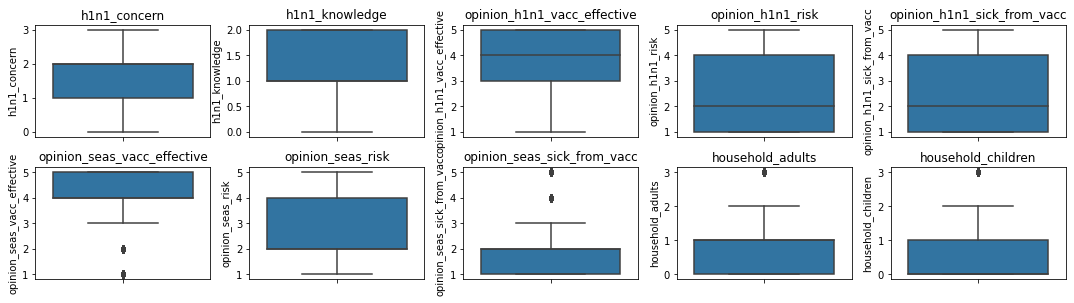

In [63]:
# Create boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_check_outliers, 1):
    plt.subplot(5, 5, i)  # Adjust grid size based on number of plots
    sns.boxplot(y=train_data_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [67]:
def find_outliers_sum(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers[col].sum()

# Get sum of outliers for each column
outliers_sum_dict = {}
for col in features_check_outliers:
    outliers_sum = find_outliers_sum(train_data_cleaned, col)
    if outliers_sum != 0:
        outliers_sum_dict[col] = outliers_sum

# Print sum of outliers
for col, outliers_sum in outliers_sum_dict.items():
    print(f"Sum of outliers in {col}: {outliers_sum}")


Sum of outliers in opinion_seas_vacc_effective: 5633.0
Sum of outliers in opinion_seas_sick_from_vacc: 28013.0
Sum of outliers in household_adults: 3375.0
Sum of outliers in household_children: 5241.0


In [66]:
# Calculate skewness for the specified columns
skewness = train_data_cleaned[features_check_outliers].skew()

# Print skewness values
print("Skewness for each column:")
print(skewness)


Skewness for each column:
h1n1_concern                  -0.164127
h1n1_knowledge                -0.234254
opinion_h1n1_vacc_effective   -0.915459
opinion_h1n1_risk              0.688264
opinion_h1n1_sick_from_vacc    0.666603
opinion_seas_vacc_effective   -1.325429
opinion_seas_risk              0.278857
opinion_seas_sick_from_vacc    0.948386
household_adults               0.785813
household_children             1.558345
dtype: float64


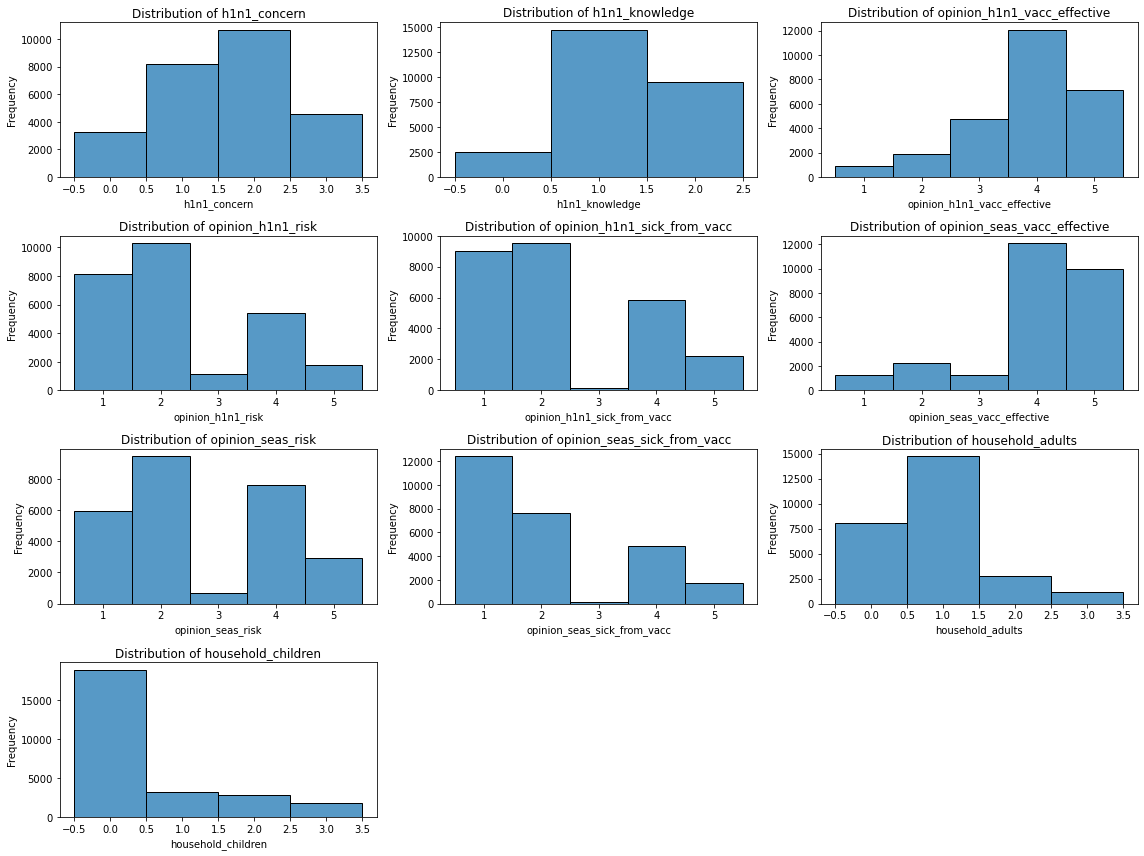

In [65]:

# Set up the plotting grid
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features_check_outliers, 1):
    plt.subplot(4, 3, i)  # Adjust the grid size if you have more/less features
    sns.histplot(train_data_cleaned[feature].dropna(), discrete=True, kde=False, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Based on the histogram plots provided, here are some observations and insights for each distribution:

h1n1_concern: This distribution appears to be relatively symmetric with no extreme skewness. The data is evenly distributed across several categories, indicating a balanced distribution.

h1n1_knowledge: This distribution is slightly right-skewed, suggesting that higher values in this variable are less frequent. This might indicate that most respondents are clustered around lower values with fewer people in higher ranges.

opinion_h1n1_vacc_effective: Similar to the second plot, this distribution is right-skewed. The majority of the data is concentrated in the lower to middle range, with a few higher values.

Plot 4: This distribution shows a notable right skew, with a higher concentration of respondents in the lower range and fewer respondents at higher values.

opinion_h1n1_risk: This histogram suggests a more uniform distribution across categories, with slight variability between them. There is no strong skewness observed.

opinion_h1n1_sick_from_vacc : This distribution is moderately right-skewed, with a noticeable concentration in the lower values and fewer observations in higher ranges.

opinion_seas_vacc_effective: Similar to the previous plot, this distribution also exhibits a right skew. There are some distinct peaks, possibly indicating subgroups or distinct responses among the population.

opinion_seas_risk: This distribution is highly right-skewed, with a sharp peak in the lower range and a rapid drop-off as values increase. This suggests that most respondents fall within the lower range, with very few outliers.

opinion_seas_sick_from_vacc : This plot also shows a right-skewed distribution, but the skewness is less pronounced than the previous one. There is still a concentration of lower values, but more observations are distributed in the mid-range.

household_adults: The distribution here is right-skewed, with a clear concentration of observations in the lower categories. There are also some mid-range observations, but very few in the higher range.

household_children: This histogram is highly skewed to the right, with an overwhelming majority of the data in the first category. There are very few observations in the other categories. This could indicate a strong preference or a dominant category in the dataset.

**General Observations and Considerations:**

Right-Skewness: Many of the distributions exhibit right skewness, which suggests that the majority of the data points are concentrated in the lower range of the variable, with a long tail of higher values. This might indicate that certain behaviors or opinions are common among the majority, while extreme or outlier responses are rare.

Potential Outliers: The long tails in some distributions suggest the presence of outliers. These could represent minority opinions or behaviors that could be significant, depending on the context of the analysis.

Distribution Diversity: The diversity in the distribution shapes indicates that different variables capture different aspects of the respondents' opinions, behaviors, or demographics. This suggests that a one-size-fits-all approach to data cleaning (such as outlier removal) may not be appropriate.

**Decision on Handling Outliers**

Upon examining the outliers in the dataset, particularly in the opinion_seas_vacc_effective, opinion_seas_sick_from_vacc, household_adults, and household_children columns, we have decided not to drop or cap these outliers. The reasoning behind this decision is as follows:

**Significance of Behavioral and Opinion Data:**

The variables opinion_seas_vacc_effective and opinion_seas_sick_from_vacc capture individuals' perceptions and opinions regarding the effectiveness and potential side effects of the seasonal flu vaccine. Outliers in these columns likely represent strong opinions or unique perspectives that are critical to understanding the full spectrum of public sentiment. Removing these outliers could lead to a loss of valuable insights, particularly in understanding the range of beliefs and attitudes that influence vaccination decisions.

**Representation of Household Demographics:**

The household_adults and household_children columns describe the composition of households. Outliers in these columns might reflect larger or smaller-than-average families. These data points are crucial for understanding how household size might impact vaccine acceptance, particularly in scenarios where larger families might have different logistical considerations or levels of concern about vaccinations. Dropping these outliers could obscure the analysis by removing genuine and potentially significant variations in household structure.

**Preservation of Data Integrity:**

Outliers often represent the diversity within the population being studied. In public health research, it is essential to capture this diversity to ensure that any interventions or recommendations are inclusive and applicable to all subgroups within the population. By retaining these outliers, we maintain the integrity of the data, allowing for a more comprehensive analysis that can inform more equitable and effective public health strategies.

**Outlier Size and Impact:**

The sum of outliers is non-negligible in these columns, indicating that these values are not just isolated anomalies but represent a substantial portion of the data. Dropping these outliers could significantly alter the dataset, leading to biased results and conclusions that might not accurately reflect the real-world population.
In conclusion, the outliers in these specific columns provide essential insights into the behavioral, opinion, and demographic diversity of the population. Retaining them allows for a more accurate and holistic analysis, particularly in understanding the factors influencing vaccine uptake and public health outcomes.

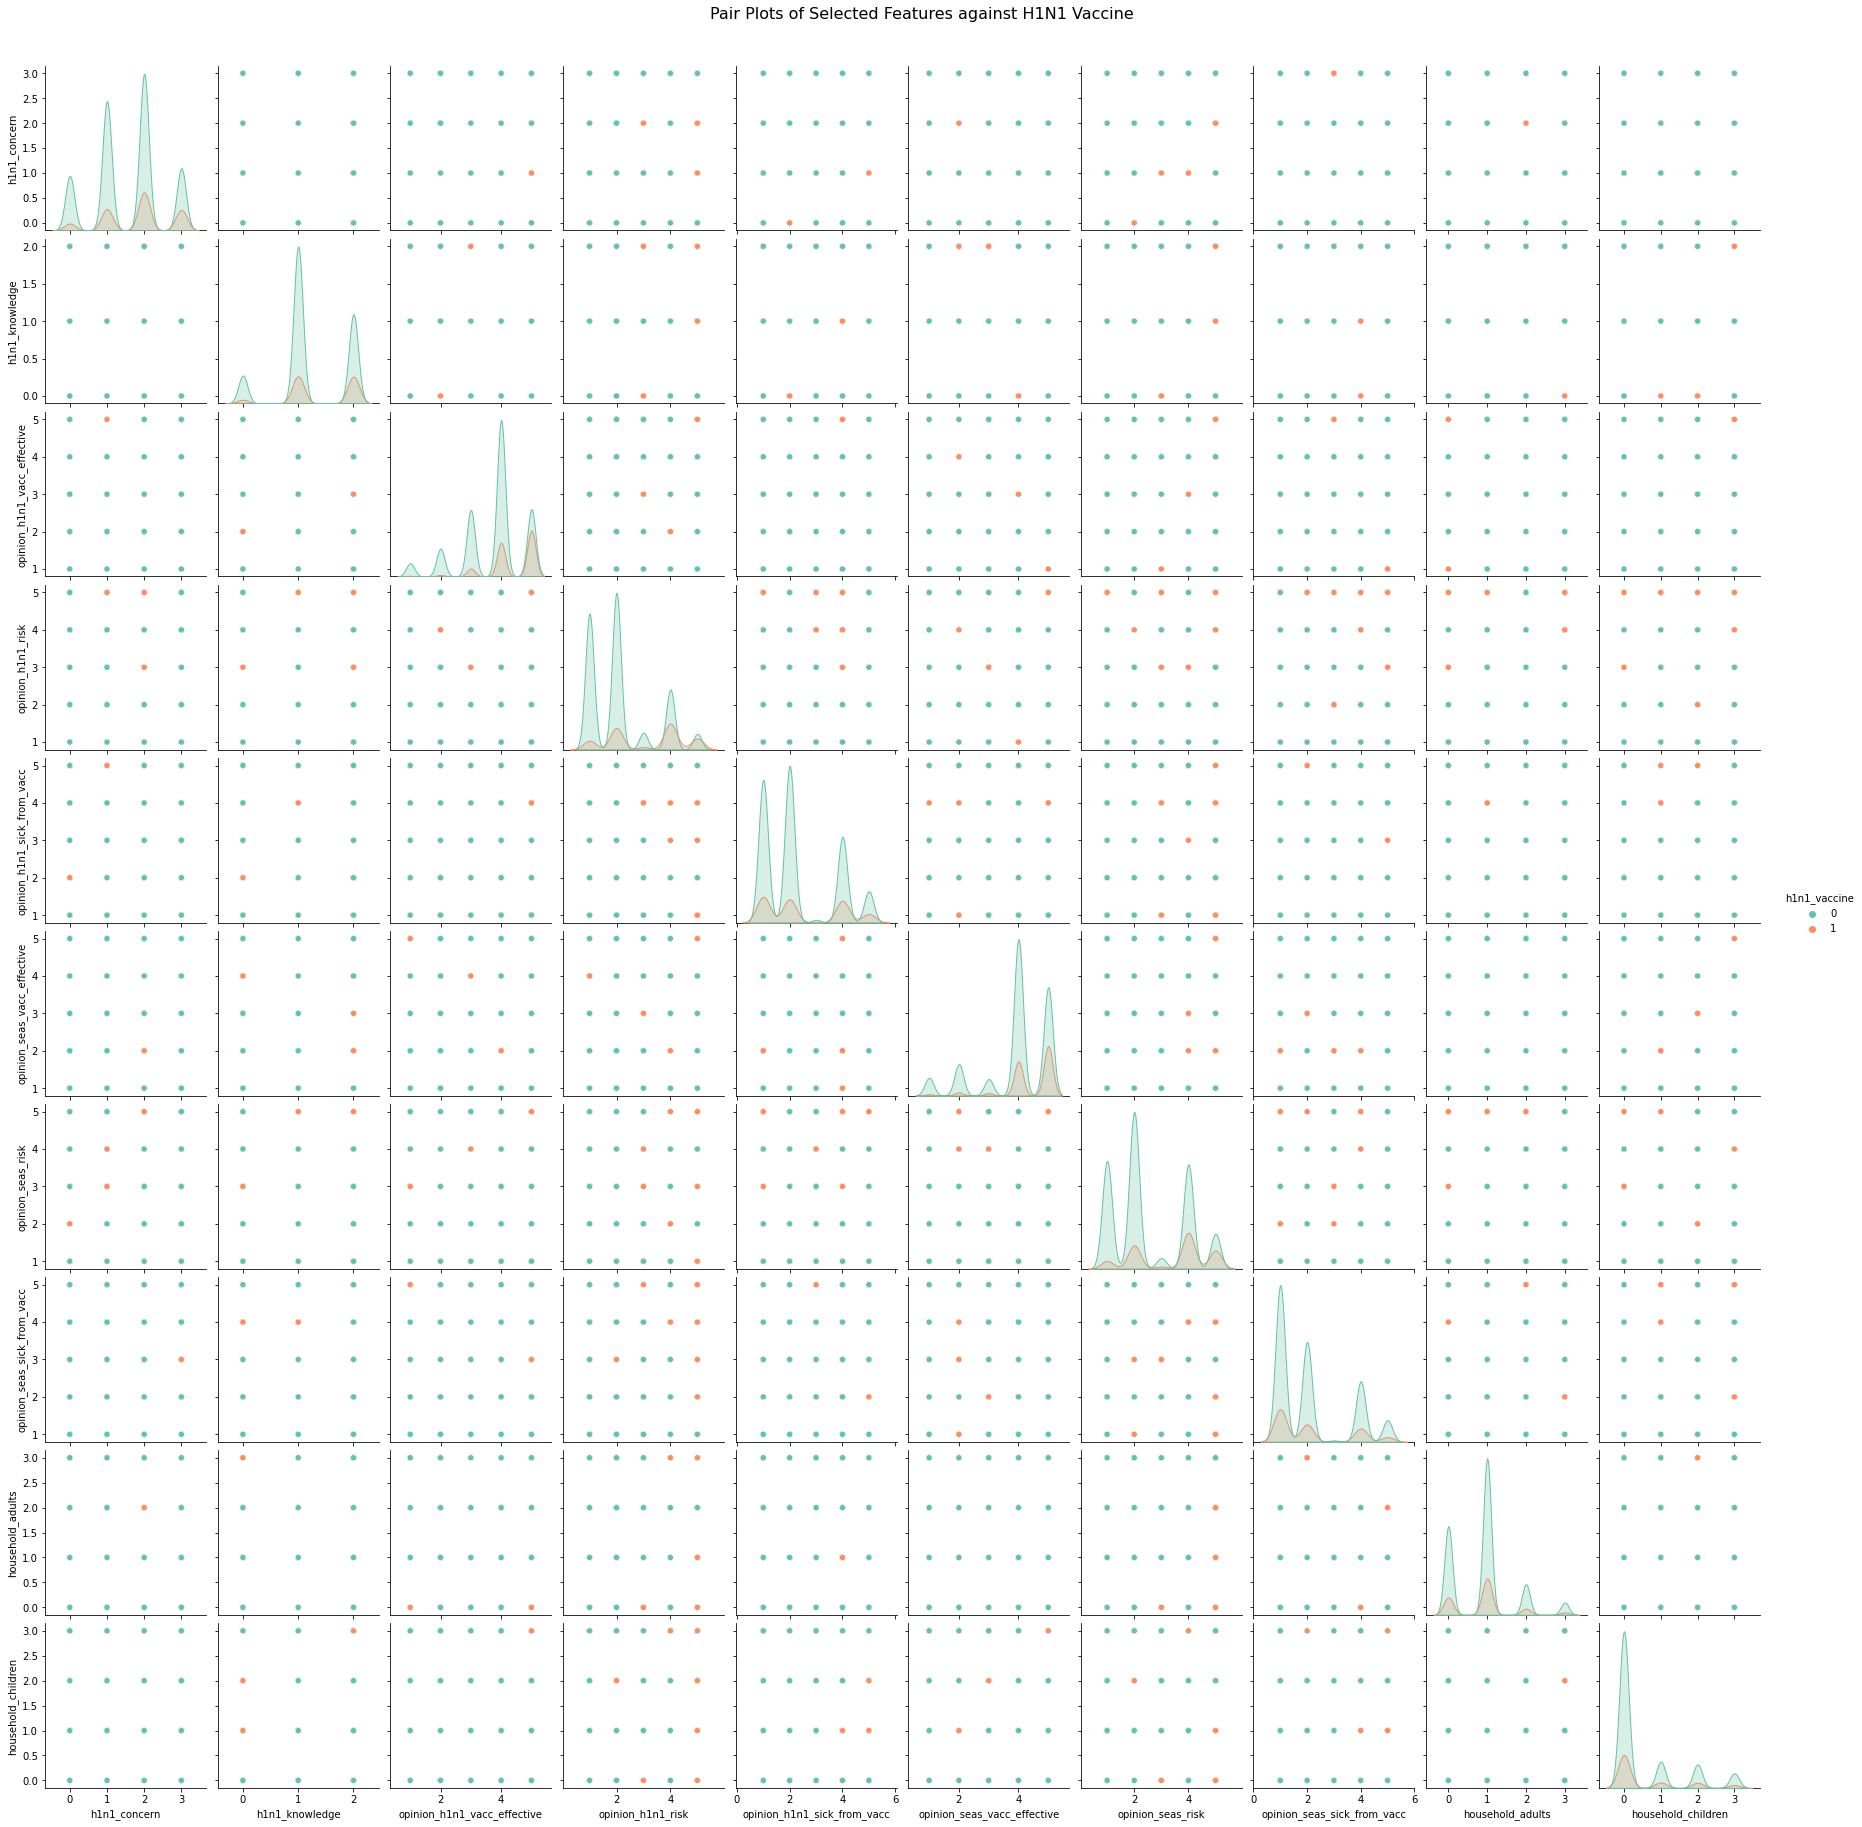

In [69]:
columns_of_interest = [
    'h1n1_concern', 'h1n1_knowledge','opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
    'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
    'opinion_seas_sick_from_vacc', 'household_adults', 'household_children','h1n1_vaccine' 
]
# Pair plot with hue as the target variable
sns.pairplot(train_data_cleaned[columns_of_interest], hue='h1n1_vaccine', palette='Set2')

# Show plot
plt.suptitle('Pair Plots of Selected Features against H1N1 Vaccine', y=1.02, fontsize=16)
plt.show()

In [70]:
train_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo